<a href="https://colab.research.google.com/github/kapilgautamin/Machine-Learning-/blob/master/Chat_Bots_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Question and Answer Chat Bots

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [0]:
import pickle
import numpy as np

In [0]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [0]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

### Tip: It may be a good idea to explore the dataset!

Below is just a sample of what you can do:

In [7]:
type(test_data)

list

In [8]:
type(train_data)

list

In [9]:
len(train_data)

10000

In [10]:
len(test_data)

1000

In [11]:
story,question,answer = train_data[0]
story,question,answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [12]:
story,question,answer = train_data[1]
story,question,answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 'no')

In [13]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

-----

## Setting up Vocabulary of All Words

In [0]:
# Create a set that holds the vocab words
vocab = set()

In [0]:
all_data = test_data + train_data

In [0]:
for story, question , answer in all_data:
    # In case you don't know what a union of sets is:
    # https://www.programiz.com/python-programming/methods/set/union
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [0]:
# Include any other words in the bot's vocabulary
vocab.add('no')
vocab.add('yes')

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [0]:
max_story_len = max([len(data[0]) for data in all_data])

In [21]:
max_story_len

156

In [0]:
max_question_len = max([len(data[1]) for data in all_data])

In [23]:
max_question_len

6

## Vectorizing the Data

In [24]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [26]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])

# TODO: Fit tokenizer on text
tokenizer.fit_on_texts(vocab)

In [28]:
tokenizer.document_count

37

In [29]:
tokenizer.word_index

{'.': 10,
 '?': 35,
 'apple': 22,
 'back': 27,
 'bathroom': 5,
 'bedroom': 13,
 'daniel': 26,
 'discarded': 4,
 'down': 11,
 'dropped': 29,
 'football': 15,
 'garden': 24,
 'got': 9,
 'grabbed': 23,
 'hallway': 2,
 'in': 34,
 'is': 1,
 'john': 16,
 'journeyed': 20,
 'kitchen': 32,
 'left': 6,
 'mary': 28,
 'milk': 36,
 'moved': 33,
 'no': 3,
 'office': 7,
 'picked': 37,
 'put': 18,
 'sandra': 25,
 'the': 31,
 'there': 19,
 'to': 17,
 'took': 30,
 'travelled': 21,
 'up': 8,
 'went': 12,
 'yes': 14}

In [30]:
tokenizer.word_index

{'.': 10,
 '?': 35,
 'apple': 22,
 'back': 27,
 'bathroom': 5,
 'bedroom': 13,
 'daniel': 26,
 'discarded': 4,
 'down': 11,
 'dropped': 29,
 'football': 15,
 'garden': 24,
 'got': 9,
 'grabbed': 23,
 'hallway': 2,
 'in': 34,
 'is': 1,
 'john': 16,
 'journeyed': 20,
 'kitchen': 32,
 'left': 6,
 'mary': 28,
 'milk': 36,
 'moved': 33,
 'no': 3,
 'office': 7,
 'picked': 37,
 'put': 18,
 'sandra': 25,
 'the': 31,
 'there': 19,
 'to': 17,
 'took': 30,
 'travelled': 21,
 'up': 8,
 'went': 12,
 'yes': 14}

In [0]:
train_story_text = []
train_question_text = []
train_answers = []

# TODO: Fill the story, question, and answers list
for story, question, answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [0]:
# TODO: Vectorize into word sequences.

In [33]:
len(train_story_text)

10000

In [34]:
train_data[1][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.',
 'Mary',
 'went',
 'back',
 'to',
 'the',
 'bedroom',
 '.',
 'Daniel',
 'went',
 'back',
 'to',
 'the',
 'hallway',
 '.']

In [35]:
tokenizer.word_index['apple']

22

In [36]:
train_data[5][2]

'yes'

### Functionalize Vectorization

In [0]:
def vectorize_stories(data, 
                      word_index=tokenizer.word_index, 
                      max_story_len=max_story_len,
                      max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        x = []
        xq = []
        y = []

        # TODO: Store every word from story into a list
        # TODO: Store every word from query into a list
        for st in story:
          x.append(word_index[str(st).lower()])
        for qu in query:
          xq.append(word_index[str(qu).lower()])
        # TODO: One-hot encode the label into a list
        y = np.zeros(len(word_index) + 1)
        # creating label 1 for the answer word index
        y[word_index[str(answer)]] = 1
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # RETURN TUPLE of paded, uniform sequences FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [0]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [86]:
inputs_train

array([[ 0,  0,  0, ..., 31, 13, 10],
       [ 0,  0,  0, ..., 31,  2, 10],
       [ 0,  0,  0, ..., 31,  5, 10],
       ...,
       [ 0,  0,  0, ..., 31, 13, 10],
       [ 0,  0,  0, ..., 36, 19, 10],
       [ 0,  0,  0, ..., 22, 19, 10]], dtype=int32)

In [87]:
queries_train

array([[ 1, 25, 34, 31,  2, 35],
       [ 1, 26, 34, 31,  5, 35],
       [ 1, 26, 34, 31,  7, 35],
       ...,
       [ 1, 25, 34, 31,  2, 35],
       [ 1, 28, 34, 31, 32, 35],
       [ 1, 28, 34, 31, 13, 35]], dtype=int32)

In [88]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [90]:
inputs_test

array([[ 0,  0,  0, ..., 31, 13, 10],
       [ 0,  0,  0, ..., 31, 24, 10],
       [ 0,  0,  0, ..., 31, 24, 10],
       ...,
       [ 0,  0,  0, ..., 31, 22, 10],
       [ 0,  0,  0, ..., 31, 24, 10],
       [ 0,  0,  0, ..., 22, 19, 10]], dtype=int32)

In [0]:
inputs_test

array([[ 0,  0,  0, ..., 25,  3, 21],
       [ 0,  0,  0, ..., 25, 34, 21],
       [ 0,  0,  0, ..., 25, 34, 21],
       ...,
       [ 0,  0,  0, ..., 25, 14, 21],
       [ 0,  0,  0, ..., 25, 34, 21],
       [ 0,  0,  0, ..., 14, 10, 21]], dtype=int32)

In [91]:
queries_test

array([[ 1, 16, 34, 31, 32, 35],
       [ 1, 16, 34, 31, 32, 35],
       [ 1, 16, 34, 31, 24, 35],
       ...,
       [ 1, 28, 34, 31, 13, 35],
       [ 1, 25, 34, 31, 24, 35],
       [ 1, 28, 34, 31, 24, 35]], dtype=int32)

In [0]:
queries_test

array([[17, 16, 31, 25, 33, 36],
       [17, 16, 31, 25, 33, 36],
       [17, 16, 31, 25, 34, 36],
       ...,
       [17,  1, 31, 25,  3, 36],
       [17,  4, 31, 25, 34, 36],
       [17,  1, 31, 25, 34, 36]], dtype=int32)

In [92]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
answers_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
sum(answers_test)

array([  0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [94]:
tokenizer.word_index['yes']


14

In [0]:
tokenizer.word_index['yes']

24

In [95]:
tokenizer.word_index['no']

3

In [0]:
tokenizer.word_index['no']

2

## Creating the Model

In [0]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [0]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

### Building the Networks

To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders

The input to your neural network for an NLP task requires you to setup an Embedding layer which creates word embedding for you(aka word2vec).

Also it would be a good idea to experiment with different hyperparameters like using/not using dropout layers, learning rate etc




### Input Encoder m

In [0]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
# Optional: Create any additional layers for neural network

### Input Encoder c

In [0]:
# Embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))

# Optional: Create any additional layers for neural network

### Question Encoder

In [0]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
# Optional: Create any additional layers for neural network

### Encode the Sequences

In [141]:
# TODO: Encode input sequence and questions (which are indices)
# to sequences of dense vectors
encoded_c = input_encoder_c(input_sequence) #output din 6
encoded_c.shape

TensorShape([Dimension(None), Dimension(156), Dimension(6)])

In [142]:
encoded_m = input_encoder_m(input_sequence) #output dim 64
encoded_m.shape

TensorShape([Dimension(None), Dimension(156), Dimension(64)])

In [143]:
encoded_q = question_encoder(question)
#output dim 64, input len 6
encoded_q.shape

TensorShape([Dimension(None), Dimension(6), Dimension(64)])

##### Use dot product to compute the match between first input vector seq and the query

In [166]:
# shape: `(samples, story_maxlen, query_maxlen)`
product = dot([encoded_m,encoded_q],normalize=True,axes=-1)
product.shape

TensorShape([Dimension(None), Dimension(156), Dimension(6)])

#### Add this match matrix with the second input vector sequence

In [148]:
# Add the match matrix with the second input vector sequence
next_product = add([product,encoded_c])
next_product.shape

TensorShape([Dimension(None), Dimension(156), Dimension(6)])

#### Concatenate

In [149]:
encoded_q.shape

TensorShape([Dimension(None), Dimension(6), Dimension(64)])

In [161]:
next_product.shape

TensorShape([Dimension(None), Dimension(156), Dimension(6)])

In [164]:
# Concatenate the match matrix with the question vector sequence
#answer = concatenate([response, question_encoded])
answer = concatenate([next_product, encoded_q])

ValueError: ignored

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [0]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [0]:
# TODO :Output a probability distribution over the vocabulary


In [0]:
model.summary()

In [0]:
# TODO: Train Model

### Saving the Model

In [0]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


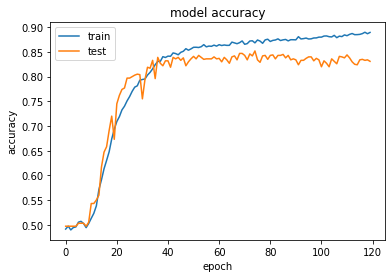

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot out training history here

### Evaluating on Given Test Set

In [0]:
model.load_weights(filename)

# TODO: Predict with the model

In [0]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [0]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [0]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [0]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [0]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  1.0


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [0]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [0]:
my_question = "Is the football in the garden ?"

In [0]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [0]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [0]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [0]:
pred_results = model.predict(([ my_story, my_ques]))

In [0]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9938636
